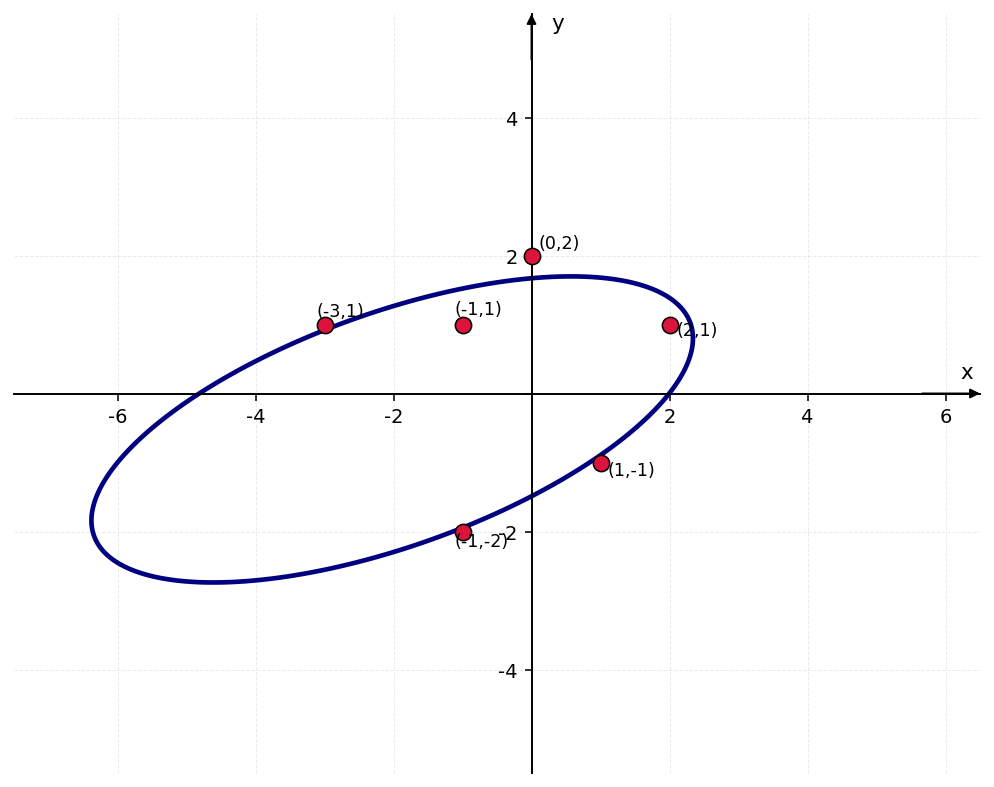

In [5]:
# 椭圆：189 x^2 + 730 y^2 - 442 x y + 533 x - 132 y - 1816 = 0
# 任务：绘制该椭圆，在图中标注 6 个指定点，刻度数字显示在穿过原点的坐标轴上，
# 并将 x、y 字母标注在坐标轴正向箭头处，避免喧宾夺主。

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# 隐式函数
def F(x, y):
    return 189*x**2 + 730*y**2 - 442*x*y + 533*x - 132*y - 1816

# 需要标记的点
points = np.array([
    (0, 2),
    (2, 1),
    (1, -1),
    (-1, -2),
    (-3, 1),
    (-1, 1),
], dtype=float)

# 估计椭圆中心（解 ∂F/∂x = 0, ∂F/∂y = 0）以便设定合适的绘图范围
A = np.array([[378.0, -442.0], [-442.0, 1460.0]])  # [[2*189, -442], [-442, 2*730]]
b = np.array([-533.0, 132.0])
x0, y0 = np.linalg.solve(A, b)

# 根据中心和点设置绘图范围，确保原点在范围内
xmin = min(points[:, 0].min(), x0) - 4.5
xmax = max(points[:, 0].max(), x0) + 4.5
ymin = min(points[:, 1].min(), y0) - 3.5
ymax = max(points[:, 1].max(), y0) + 3.5
# 确保包含 0
xmin = min(xmin, 0.0)
xmax = max(xmax, 0.0)
ymin = min(ymin, 0.0)
ymax = max(ymax, 0.0)

# 采样网格并绘制等高线 F(x, y) = 0
nx = ny = 900
xs = np.linspace(xmin, xmax, nx)
ys = np.linspace(ymin, ymax, ny)
X, Y = np.meshgrid(xs, ys)
Z = F(X, Y)

fig, ax = plt.subplots(figsize=(7.2, 6.0), dpi=140)
# 椭圆曲线（隐式轮廓）
ax.contour(X, Y, Z, levels=[0.0], colors=['navy'], linewidths=2.4)

# 标记点（稍粗但不抢眼）
ax.scatter(points[:, 0], points[:, 1], s=70, c='crimson', edgecolors='black', linewidths=0.8, zorder=3)

# 小字号坐标标注 + 轻微偏移，防止与点或曲线重叠
offsets = [(0.10, 0.10), (0.10, -0.15), (0.10, -0.18), (-0.12, -0.22), (-0.12, 0.12), (-0.12, 0.15)]
for (x, y), (dx, dy) in zip(points, offsets):
    ax.text(x + dx, y + dy, f"({int(x)},{int(y)})", fontsize=9, color='black')

# == 坐标系设置：让刻度和数字显示在经过原点的坐标轴上 ==
ax.set_aspect('equal', adjustable='box')
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# 仅保留左、下脊，移动到数据 0 位置；隐藏上、右边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(('data', 0.0))
ax.spines['left'].set_linewidth(1.0)
ax.spines['bottom'].set_linewidth(1.0)

# 刻度显示在移动后的轴上（而不是图框边缘）
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# 让 0 刻度不显示数字，避免在轴交点处拥挤
fmt0 = lambda v, pos: '' if abs(v) < 1e-12 else f'{v:g}'
ax.xaxis.set_major_formatter(mticker.FuncFormatter(fmt0))
ax.yaxis.set_major_formatter(mticker.FuncFormatter(fmt0))

# 在正向端添加小箭头并于箭头旁标注 x、y
width = xmax - xmin
height = ymax - ymin
arrow_kw = dict(arrowstyle='-|>', color='black', lw=1.0, shrinkA=0, shrinkB=0, mutation_scale=10)
# 箭头
ax.annotate('', xy=(xmax, 0), xytext=(xmax - 0.06*width, 0), arrowprops=arrow_kw)
ax.annotate('', xy=(0, ymax), xytext=(0, ymax - 0.06*height), arrowprops=arrow_kw)
# 轴字母（靠近箭头，字号略小）
ax.text(xmax - 0.02*width, 0 + 0.02*height, 'x', fontsize=11)
ax.text(0 + 0.02*width, ymax - 0.02*height, 'y', fontsize=11)

# 网格置于曲线之下，淡化处理
ax.set_axisbelow(True)
ax.grid(alpha=0.25, linestyle='--', linewidth=0.5)

fig.tight_layout()
plt.show()